<a href="https://colab.research.google.com/github/rikuProgramer/Kikagaku_DeepLearningHands-onCourse/blob/main/%E7%94%BB%E5%83%8F%E5%87%A6%E7%90%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 画像処理の基礎

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [9]:
img = cv2.imread('/content/drive/MyDrive/キカガク/ディープラーニングハンズオンコース/画像処理/sample.png')

In [10]:
type(img)

numpy.ndarray

In [11]:
img.shape

(225, 225, 3)

In [12]:
img.dtype

dtype('uint8')

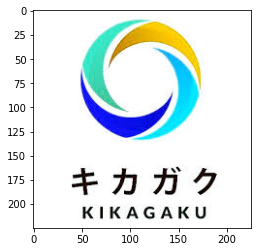

In [13]:
plt.imshow(img)

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

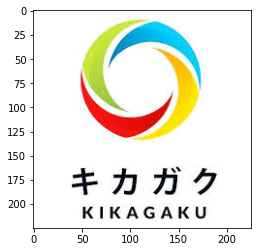

In [15]:
plt.imshow(img_rgb)

In [16]:
from PIL import Image

In [17]:
img = Image.open('/content/drive/MyDrive/キカガク/ディープラーニングハンズオンコース/画像処理/sample.png')

In [18]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

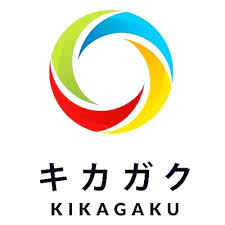

In [19]:
img

In [20]:
img = np.array(img)

In [21]:
type(img)

numpy.ndarray

In [22]:
img.shape

(225, 225, 3)

In [23]:
img.dtype

dtype('uint8')

In [24]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [25]:
img_gray.shape, img.shape

((225, 225), (225, 225, 3))

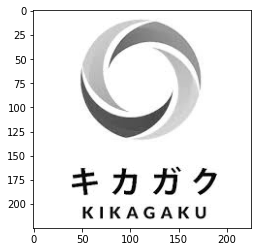

In [26]:
plt.imshow(img_gray, cmap='gray')

In [27]:
kernel = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1]
])

In [28]:
img_conv = cv2.filter2D(img_gray, -1, kernel)

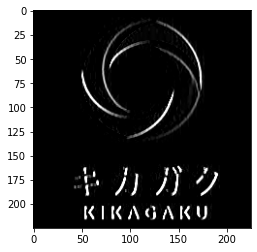

In [29]:
plt.imshow(img_conv, cmap='gray')

In [30]:
kernel = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1]
])

In [31]:
img_conv = cv2.filter2D(img_gray, -1, kernel)

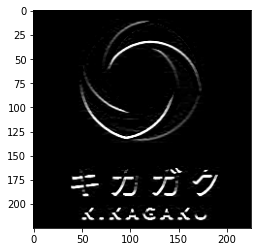

In [32]:
plt.imshow(img_conv, cmap='gray')

# 畳み込みニューラルネットワーク

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms

In [34]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [35]:
train = torchvision.datasets.MNIST(root='.', train=True, download=True, transform=transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [36]:
train

Dataset MNIST
    Number of datapoints: 60000
    Root location: .
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [37]:
len(train)

60000

In [38]:
type(train[0])

tuple

In [39]:
train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [40]:
train[0][1]

5

In [41]:
train[0][0].shape

torch.Size([1, 28, 28])

In [42]:
img = np.transpose(train[0][0], (1, 2, 0))

In [43]:
img.shape

torch.Size([28, 28, 1])

In [44]:
img = img.reshape(img.shape[0], img.shape[1])

In [45]:
img.shape

torch.Size([28, 28])

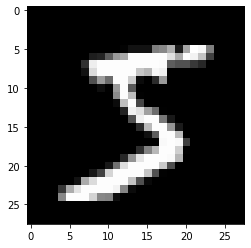

In [46]:
plt.imshow(img, cmap='gray')

In [47]:
x = train[0][0]
x.shape

torch.Size([1, 28, 28])

In [48]:
import torch.nn as nn
import torch.nn.functional as F

conv = nn.Conv2d(
    in_channels=1,
    out_channels=4,
    kernel_size=3,
    stride=1,
    padding=1
)

conv.weight

Parameter containing:
tensor([[[[ 0.2693, -0.0899,  0.1475],
          [ 0.1365,  0.1932, -0.1398],
          [ 0.0988,  0.1920,  0.2460]]],


        [[[ 0.0628,  0.2872,  0.2616],
          [-0.2206, -0.0483, -0.1840],
          [ 0.0272,  0.0626, -0.2783]]],


        [[[ 0.0828, -0.0144,  0.0671],
          [ 0.2824,  0.0488,  0.2429],
          [-0.2246,  0.2429, -0.1317]]],


        [[[-0.1076, -0.2897,  0.1650],
          [-0.1351,  0.2056,  0.0475],
          [ 0.1326, -0.1065, -0.0896]]]], requires_grad=True)

In [49]:
conv.weight.shape

torch.Size([4, 1, 3, 3])

In [50]:
conv.bias

Parameter containing:
tensor([ 0.1861, -0.2917, -0.1357,  0.1981], requires_grad=True)

In [51]:
conv.bias.shape

torch.Size([4])

In [52]:
x = x.reshape(1, 1, 28, 28)
x = conv(x)
x

tensor([[[[ 0.1861,  0.1861,  0.1861,  ...,  0.1861,  0.1861,  0.1861],
          [ 0.1861,  0.1861,  0.1861,  ...,  0.1861,  0.1861,  0.1861],
          [ 0.1861,  0.1861,  0.1861,  ...,  0.1861,  0.1861,  0.1861],
          ...,
          [ 0.1861,  0.1861,  0.1861,  ...,  0.1861,  0.1861,  0.1861],
          [ 0.1861,  0.1861,  0.1861,  ...,  0.1861,  0.1861,  0.1861],
          [ 0.1861,  0.1861,  0.1861,  ...,  0.1861,  0.1861,  0.1861]],

         [[-0.2917, -0.2917, -0.2917,  ..., -0.2917, -0.2917, -0.2917],
          [-0.2917, -0.2917, -0.2917,  ..., -0.2917, -0.2917, -0.2917],
          [-0.2917, -0.2917, -0.2917,  ..., -0.2917, -0.2917, -0.2917],
          ...,
          [-0.2917, -0.2917, -0.2917,  ..., -0.2917, -0.2917, -0.2917],
          [-0.2917, -0.2917, -0.2917,  ..., -0.2917, -0.2917, -0.2917],
          [-0.2917, -0.2917, -0.2917,  ..., -0.2917, -0.2917, -0.2917]],

         [[-0.1357, -0.1357, -0.1357,  ..., -0.1357, -0.1357, -0.1357],
          [-0.1357, -0.1357, -

In [53]:
x.shape

torch.Size([1, 4, 28, 28])

In [54]:
x = F.max_pool2d(x, kernel_size=2, stride=2)
x.shape

torch.Size([1, 4, 14, 14])

In [55]:
print('channels:', x.shape[1])
print('height:', x.shape[2])
print('width:', x.shape[3])

channels: 4
height: 14
width: 14


In [56]:
x_shape = x.shape[1] * x.shape[2] * x.shape[3]
x_shape

784

In [57]:
x = x.view(-1, x_shape)
x.shape

torch.Size([1, 784])

In [58]:
fc = nn.Linear(x_shape, 10)
x = fc(x)
x

tensor([[ 0.4761, -0.2782, -0.0485, -0.3092,  0.0852,  0.2397,  0.0505, -0.1137,
         -0.0477, -0.0025]], grad_fn=<AddmmBackward0>)

In [59]:
x.shape

torch.Size([1, 10])

# 画像のクラス分類

In [60]:
!pip install -q pytorch_lightning
!pip install -q torchmetrics

     |████████████████████████████████| 708 kB 28.6 MB/s 
     |████████████████████████████████| 529 kB 67.5 MB/s 


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import pytorch_lightning as pl
import torchmetrics
from torchmetrics.functional import accuracy
import torchsummary
from torchsummary import summary
from pytorch_lightning.loggers import CSVLogger

In [62]:
#データセットの変換を定義
transform = transforms.Compose([
    transforms.ToTensor()
])

In [63]:
train_val = datasets.MNIST('./', train=True, download=True, transform=transform)
test = datasets.MNIST('./', train=False, download=True, transform=transform)

In [64]:
len(train_val), len(test)

(60000, 10000)

In [65]:
#train valに分割
n_train = 50000
n_val = 10000

torch.manual_seed(0)
train, val = torch.utils.data.random_split(train_val, [n_train, n_val])

len(train), len(val)

(50000, 10000)

In [66]:
train[0][0].shape

torch.Size([1, 28, 28])

9

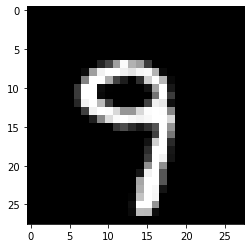

In [67]:
import matplotlib.pyplot as plt
plt.imshow(train[0][0].reshape(28, 28), cmap='gray');
train[0][1]

In [68]:
batch_size = 1024

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

In [69]:
pl.seed_everything(0)

transform = transforms.Compose([
    transforms.ToTensor()
])

train_val = datasets.MNIST('./', train=True, download=True, transform=transform)
teset = datasets.MNIST('./', train=False, download=True, transform=transform)

n_train = 50000
n_val = 10000
train, val = torch.utils.data.random_split(train_val, [n_train, n_val])

batch_size = 1024

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

INFO:pytorch_lightning.utilities.seed:Global seed set to 0


In [70]:
class Net(pl.LightningModule):

    def __init__(self):
        super().__init__()

        self.conv = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3, padding=1)
        self.bn = nn.BatchNorm2d(3)
        self.fc = nn.Linear(588, 10)


    def forward(self, x):
        h = self.conv(x)
        h = F.relu(h)
        h = self.bn(h)
        h = F.max_pool2d(h, kernel_size=2, stride=2)
        h = h.view(-1, 588)
        h = self.fc(h)
        return h


    def training_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        self.log('train_acc', accuracy(y.softmax(dim=-1), t), on_step=True, on_epoch=True, prog_bar=True)
        return loss


    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log('val_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        self.log('test_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer

↓GPUに設定する必要があるので「ランタイム」から設定をいじる

In [85]:
# 学習の実行
pl.seed_everything(0)
net = Net()
logger = CSVLogger(save_dir='logs', name='my_exp')
trainer = pl.Trainer(max_epochs=5, gpus=1, deterministic=True, logger=logger)
trainer.fit(net, train_loader, val_loader)

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:448: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name | Type        | Params
-------------------------------------
0 | conv | Conv2d      | 30    
1 | bn   | BatchNorm2d | 6     


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1896: PossibleUserWarning: The number of training batches (48) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


In [72]:
log = pd.read_csv('/content/logs/my_exp/version_0/metrics.csv')

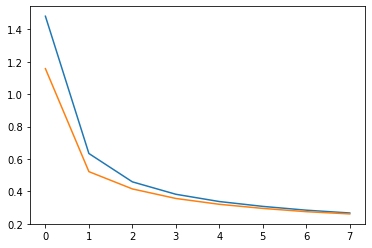

In [73]:
log[['train_loss_epoch', 'epoch']].dropna(how='any', axis=0).reset_index()['train_loss_epoch'].plot();
log[['val_loss', 'epoch']].dropna(how='any', axis=0).reset_index()['val_loss'].plot();

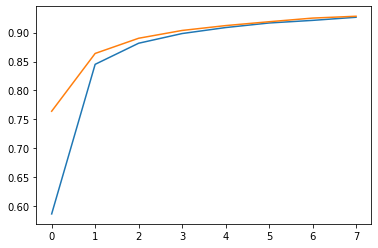

In [74]:
log[['train_acc_epoch']].dropna(how='any', axis=0).reset_index()['train_acc_epoch'].plot();
log[['val_acc', 'epoch']].dropna(how='any', axis=0).reset_index()['val_acc'].plot();

In [75]:
results = trainer.test(dataloaders=test_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1390: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  + f" You can pass `.{fn}(ckpt_path='best')` to use the best model or"
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at logs/my_exp/version_0/checkpoints/epoch=7-step=384.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from checkpoint at logs/my_exp/version_0/checkpoints/epoch=7-step=384.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.934499979019165
        test_loss           0.24197539687156677
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [76]:
torch.save(net.state_dict(), 'mnist.py')

In [77]:
net = Net().cpu().eval()

In [78]:
net.load_state_dict(torch.load('mnist.py', map_location=torch.device('cpu')))

<All keys matched successfully>

In [79]:
x, t = test[0]

y = net(x.unsqueeze(0))
print(y)

tensor([[-1.0575, -6.1372, -1.1855,  1.4635, -2.3695, -1.0099, -4.6931,  9.5827,
          0.0165,  3.4815]], grad_fn=<AddmmBackward0>)


In [80]:
y = F.softmax(y)
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([[2.3871e-05, 1.4852e-07, 2.1002e-05, 2.9699e-04, 6.4281e-06, 2.5034e-05,
         6.2941e-07, 9.9732e-01, 6.9870e-05, 2.2342e-03]],
       grad_fn=<SoftmaxBackward0>)

In [81]:
y = torch.argmax(y)
print(y)

tensor(7)


In [82]:
t

7

# ファインチューニング

In [27]:
!pip install -q pytorch_lightning
!pip install -q torchmetrics

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms
from torchvision import datasets
import pytorch_lightning as pl
import torchmetrics
from torchmetrics.functional import accuracy
import torchsummary
from torchsummary import summary
from pytorch_lightning.loggers import CSVLogger

In [28]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_val = datasets.CIFAR10('./', train=True, download=True, transform=transform)
test = datasets.CIFAR10('./', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [29]:
x, t = train_val[0]

In [30]:
x.shape

torch.Size([3, 32, 32])

In [31]:
t

6

In [32]:
x.permute(1, 2, 0).shape

torch.Size([32, 32, 3])

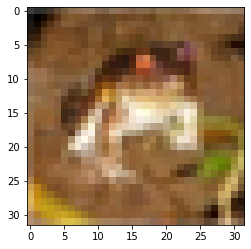

In [33]:
plt.imshow(x.permute(1, 2, 0));

In [34]:
t

6

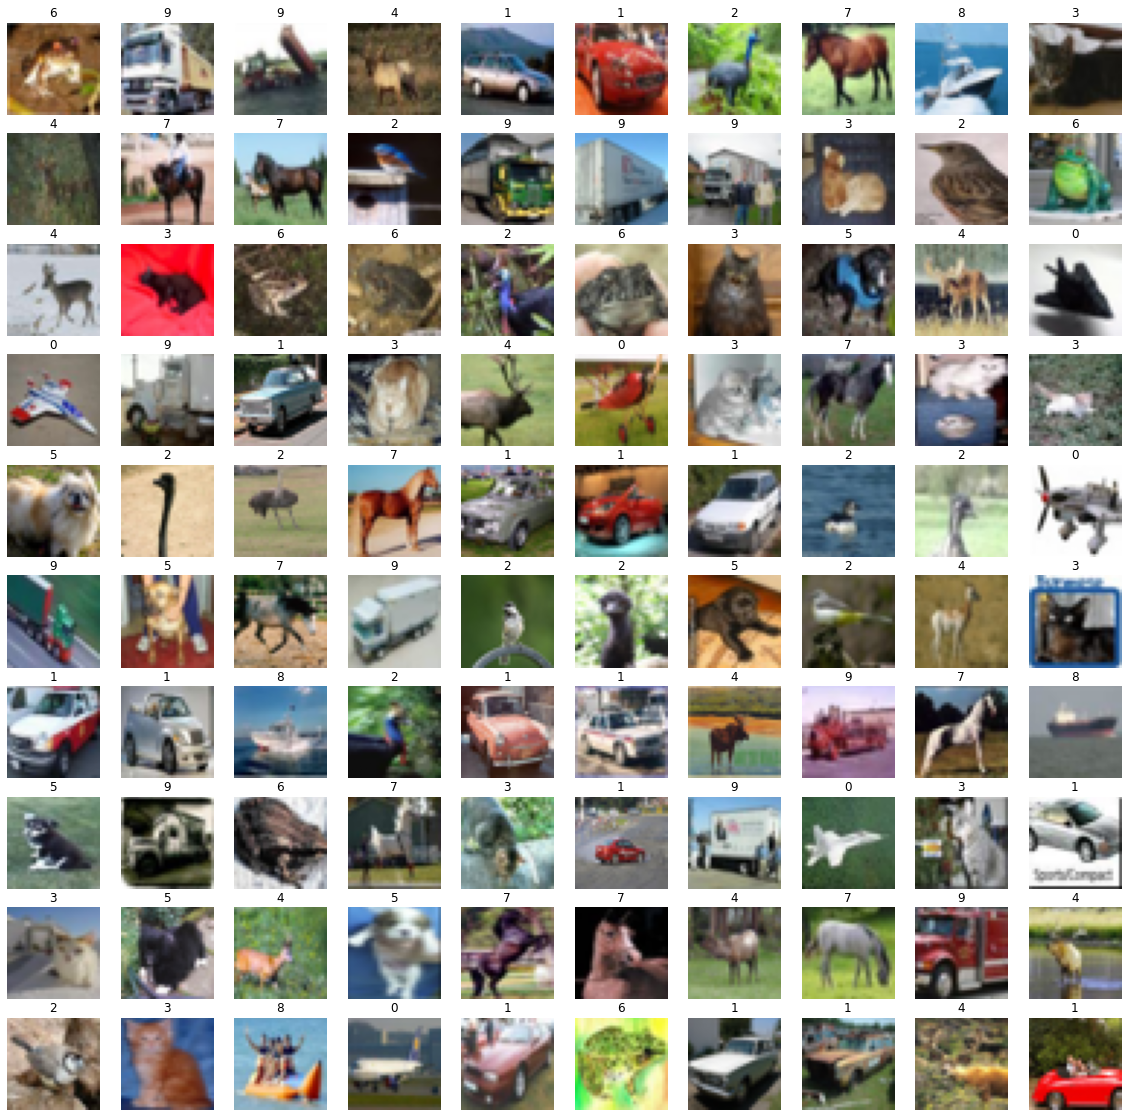

In [35]:
plt.figure(figsize=(20,20))
for n in range(100):
  x, t = train_val[n]
  plt.subplot(10, 10, n+1)
  plt.title(train_val[n][1])
  plt.axis('off')
  plt.imshow(x.permute(1, 2, 0))

In [36]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.546, 0.406], std=[0.229, 0.224, 0.225])
])

In [37]:
train_val = datasets.CIFAR10('./', train=True, download=True, transform=transform)
test = datasets.CIFAR10('./', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [38]:
len(train_val), len(test)

(50000, 10000)

In [39]:
pl.seed_everything(0)
n_train, n_val = 40000, 10000
train, val = torch.utils.data.random_split(train_val, [n_train, n_val])

batch_size = 256

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
val_loader = torch.utils.data.DataLoader(val, batch_size)
test_loader = torch.utils.data.DataLoader(test, batch_size)

INFO:pytorch_lightning.utilities.seed:Global seed set to 0


In [40]:
from torchvision.models import resnet18

In [41]:
feature = resnet18(pretrained=True)

In [42]:
x, t = train[0]

In [43]:
x.shape

torch.Size([3, 224, 224])

In [44]:
h = feature(x.unsqueeze(0))
h.shape

torch.Size([1, 1000])

In [45]:
fc = nn.Linear(1000, 10)
h = fc(h)
h.shape

torch.Size([1, 10])

In [46]:
class Net(pl.LightningModule):

  def __init__(self):
    super().__init__()

    self.feature = resnet18(pretrained=True)
    self.fc = nn.Linear(1000, 10)

  def forward(self, x):
    h = self.feature(x)
    h = self.fc(h)
    return h

  def training_step(self, batch, batch_idx):
    x, t = batch
    y = self(x)
    loss = F.cross_entropy(y, t)
    self.log('train_loss', loss, on_step=False, on_epoch=True)
    self.log('train_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
    return loss

  def validation_step(self, batch, batch_idx):
    x, t = batch
    y = self(x)
    loss = F.cross_entropy(y, t)
    self.log('val_loss', loss, on_step=False, on_epoch=True)
    self.log('val_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
    return loss

  def test_step(self, batch, batch_idx):
    x, t = batch
    y = self(x)
    loss = F.cross_entropy(y, t)
    self.log('test_loss', loss, on_step=False, on_epoch=True)
    self.log('test_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
    return loss

  def configure_optimizers(self):
    optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
    return optimizer

In [47]:
pl.seed_everything(0)
net = Net()
logger = CSVLogger(save_dir='logs', name='my_exp')
trainer = pl.Trainer(max_epochs=3, gpus=1, deterministic=False, logger=logger)
trainer.fit(net, train_loader, val_loader)

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params
-----------------------------------
0 | feature | ResNet | 11.7 M
1 | fc      | Linear | 10.0 K
-----------------------------------
11.7 M    Trainable params
0         Non-trainable params
11.7 M    Total params
46.798    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [47]:
results = trainer.test(dataloaders=test_loader)

In [48]:
feature = resnet18(pretrained=True)
for param in feature.parameters():
  param.requires_grad = False

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [49]:
class Net(pl.LightningModule):

    def __init__(self):
        super().__init__()

        self.feature = resnet18(pretrained=True)
        for param in self.feature.parameters():
            param.requires_grad = False

        self.fc = nn.Linear(1000, 10)


    def forward(self, x):
        h = self.feature(x)
        h = self.fc(h)
        return h


    def training_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('train_loss', loss, on_step=False, on_epoch=True)
        self.log('train_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def validation_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('val_loss', loss, on_step=False, on_epoch=True)
        self.log('val_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def test_step(self, batch, batch_idx):
        x, t = batch
        y = self(x)
        loss = F.cross_entropy(y, t)
        self.log('test_loss', loss, on_step=False, on_epoch=True)
        self.log('test_acc', accuracy(y.softmax(dim=-1), t), on_step=False, on_epoch=True)
        return loss


    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=0.01)
        return optimizer


In [50]:
pl.seed_everything(0)
net = Net()
logger = CSVLogger(save_dir='logs', name='my_exp')
trainer = pl.Trainer(max_epochs=3, gpus=1, deterministic=False, logger=logger)
trainer.fit(net, train_loader, val_loader)

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:448: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  f"Setting `Trainer(gpus={gpus!r})` is deprecated in v1.7 and will be removed"
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type   | Params
-----------------------------------
0 | feature | ResNet | 11.7 M
1 | fc      | Linear | 10.0 K
--------

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [51]:
results = trainer.test(dataloaders=test_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1390: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  + f" You can pass `.{fn}(ckpt_path='best')` to use the best model or"
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at logs/my_exp/version_2/checkpoints/epoch=2-step=468.ckpt
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.utilities.rank_zero:Loaded model weights from checkpoint at logs/my_exp/version_2/checkpoints/epoch=2-step=468.ckpt


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7529000043869019
        test_loss           0.7124852538108826
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
